# Zadanie 1 powiaty.gpkg
   
1. Za pomocą funkcji geopandas "intersect" sprawdź powierzchnię obszarów zajmowanych przez obszary NATURA 2000 w poszczególnych powiatach (GDOS:SpecjalneObszaryOchrony). 
2. Zwrócić dane do pliku csv w układzie `id_powiat | nazwa_powiatu| powierzchnia_powiatu | procent_powierzchni__zajmowany_przez_natura_2000 | geometry`. Zwrócone dane muszą posiadać georeferencje w układzie współrzędnych PL1992(EPSG:2180).
3. Dane zwizualizuj na mapie tematycznej w skali barwnej. Kolorem "czerwonym" powiaty o największej powierzchni zajmowanej przez obszary NATURA 2000, kolorem zielonym o najmniejszej.
 

In [1]:
import os
import fiona
import numpy as np
import pprint
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import geopandas as gpd
import pandas as pd
import json

PROJ: proj_create_from_database: Cannot find proj.db


## Powierzchnia obszarów zajmowanych przez NATURA 2000 w poszczególnych powiatach

Postępowanie:

1. Wczytanie danych z warstwy `powiaty`.
2. Wczytanie danych z warstwy `GDOS:SpecjalneObszaryOchrony`.
3. Intersect obu tych warstw i obliczenie powierzchni tych części wspólnych.
4. Połączenie wyników (agregacja) na podstawie powiatów.

### Wczytanie danych

In [2]:
powiaty="powiaty.gpkg"

powiaty_gdf = gpd.read_file(powiaty, layer='powiaty')
powiaty_gdf.head()

,iip_przest,iip_identy,iip_wersja,jpt_sjr_ko,jpt_kod_je,jpt_nazwa_,jpt_nazw01,jpt_organ_,jpt_orga01,jpt_jor_id,...,id_bufora_,id_bufor01,id_technic,jpt_opis,jpt_sps_ko,gra_ids,status_obi,opis_bledu,typ_bledu,geometry
0,PL.PZGIK.200,f87cae01-4621-41f4-b768-c777cf94d1d8,2012-09-27T08:01:01+02:00,POW,1812,powiat niżański,None,None,NZN,NaN,...,NaN,13878.0,NaN,829081,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((711095.856 277431.597, 711101...."
1,PL.PZGIK.200,f322275e-1c48-431f-889e-8bb0ccb46e81,2012-09-27T08:01:01+02:00,POW,1813,powiat przemyski,None,None,NZN,NaN,...,NaN,13878.0,NaN,829082,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((734488.435 209795.384, 734490...."
2,PL.PZGIK.200,59e7c5a7-8597-4c55-812a-b30932c08dd2,2012-09-27T08:01:01+02:00,POW,1814,powiat przeworski,None,None,NZN,NaN,...,NaN,13878.0,NaN,829083,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((731943.256 233158.050, 731989...."
3,PL.PZGIK.200,e86b1e71-8958-42ee-bec5-ca3c87907bc8,2012-09-27T08:01:01+02:00,POW,1815,powiat ropczycko-sędziszowski,None,None,NZN,NaN,...,NaN,13878.0,NaN,829084,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((676562.888 239118.997, 676567...."
4,PL.PZGIK.200,7f2af54d-150f-4b9f-b9fb-d2ce1b04166e,2012-09-27T08:01:01+02:00,POW,1816,powiat rzeszowski,None,None,NZN,NaN,...,NaN,13878.0,NaN,829085,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((696894.808 237348.347, 696909...."


<AxesSubplot:>

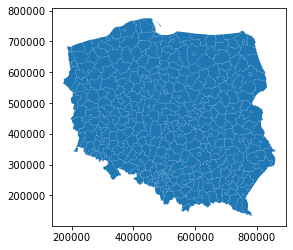

In [3]:
powiaty_gdf.plot()

In [4]:
powiaty_gdf.crs

<Projected CRS: EPSG:2180>
Name: ETRS89 / Poland CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
powiaty_natura_200_gdf = gpd.read_file(powiaty, layer='GDOS:SpecjalneObszaryOchrony')
powiaty_natura_200_gdf.head()

,gid,nazwa,kod,kodinspire,geometry
0,45177,Dolina Tywy,PLH320050,PL.ZIPOP.1393.N2K.PLH320050.H,"MULTIPOLYGON (((200250.670 605569.370, 200270...."
1,44682,Dolina Krąpieli,PLH320005,PL.ZIPOP.1393.N2K.PLH320005.H,"MULTIPOLYGON (((242416.184 616019.089, 242423...."
2,44863,Lasy Bierzwnickie,PLH320044,PL.ZIPOP.1393.N2K.PLH320044.H,"MULTIPOLYGON (((271903.900 583795.850, 271992...."
3,45236,Dolina Płoni i Jezioro Miedwie,PLH320006,PL.ZIPOP.1393.N2K.PLH320006.H,"MULTIPOLYGON (((235053.204 593519.856, 235064...."
4,45237,Dolna Odra,PLH320037,PL.ZIPOP.1393.N2K.PLH320037.H,"MULTIPOLYGON (((191622.410 603090.499, 191640...."


<AxesSubplot:>

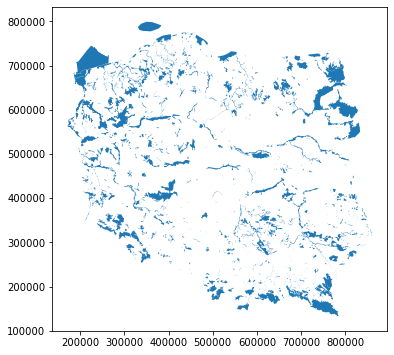

In [6]:
powiaty_natura_200_gdf.plot(figsize=(6, 6))

In [7]:
powiaty_gdf.crs

<Projected CRS: EPSG:2180>
Name: ETRS89 / Poland CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Obliczanie powierzchni

In [8]:
area = gpd.GeoDataFrame(powiaty_gdf.area/1000000)
powiaty_gdf.insert(2, "Area [km2]", area)
powiaty_gdf.head()

,iip_przest,iip_identy,Area [km2],iip_wersja,jpt_sjr_ko,jpt_kod_je,jpt_nazwa_,jpt_nazw01,jpt_organ_,jpt_orga01,...,id_bufora_,id_bufor01,id_technic,jpt_opis,jpt_sps_ko,gra_ids,status_obi,opis_bledu,typ_bledu,geometry
0,PL.PZGIK.200,f87cae01-4621-41f4-b768-c777cf94d1d8,785.532651,2012-09-27T08:01:01+02:00,POW,1812,powiat niżański,None,None,NZN,...,NaN,13878.0,NaN,829081,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((711095.856 277431.597, 711101...."
1,PL.PZGIK.200,f322275e-1c48-431f-889e-8bb0ccb46e81,1211.565190,2012-09-27T08:01:01+02:00,POW,1813,powiat przemyski,None,None,NZN,...,NaN,13878.0,NaN,829082,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((734488.435 209795.384, 734490...."
2,PL.PZGIK.200,59e7c5a7-8597-4c55-812a-b30932c08dd2,697.960193,2012-09-27T08:01:01+02:00,POW,1814,powiat przeworski,None,None,NZN,...,NaN,13878.0,NaN,829083,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((731943.256 233158.050, 731989...."
3,PL.PZGIK.200,e86b1e71-8958-42ee-bec5-ca3c87907bc8,548.023258,2012-09-27T08:01:01+02:00,POW,1815,powiat ropczycko-sędziszowski,None,None,NZN,...,NaN,13878.0,NaN,829084,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((676562.888 239118.997, 676567...."
4,PL.PZGIK.200,7f2af54d-150f-4b9f-b9fb-d2ce1b04166e,1157.134339,2012-09-27T08:01:01+02:00,POW,1816,powiat rzeszowski,None,None,NZN,...,NaN,13878.0,NaN,829085,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((696894.808 237348.347, 696909...."


In [9]:
area = gpd.GeoDataFrame(powiaty_natura_200_gdf.area/1000000)
powiaty_natura_200_gdf.insert(2, "N2000 Area [km2]", area)
powiaty_natura_200_gdf.head()

,gid,nazwa,N2000 Area [km2],kod,kodinspire,geometry
0,45177,Dolina Tywy,37.548644,PLH320050,PL.ZIPOP.1393.N2K.PLH320050.H,"MULTIPOLYGON (((200250.670 605569.370, 200270...."
1,44682,Dolina Krąpieli,2.327577,PLH320005,PL.ZIPOP.1393.N2K.PLH320005.H,"MULTIPOLYGON (((242416.184 616019.089, 242423...."
2,44863,Lasy Bierzwnickie,87.923023,PLH320044,PL.ZIPOP.1393.N2K.PLH320044.H,"MULTIPOLYGON (((271903.900 583795.850, 271992...."
3,45236,Dolina Płoni i Jezioro Miedwie,209.107632,PLH320006,PL.ZIPOP.1393.N2K.PLH320006.H,"MULTIPOLYGON (((235053.204 593519.856, 235064...."
4,45237,Dolna Odra,304.066426,PLH320037,PL.ZIPOP.1393.N2K.PLH320037.H,"MULTIPOLYGON (((191622.410 603090.499, 191640...."


In [10]:
powiaty_int = gpd.overlay(powiaty_gdf, powiaty_natura_200_gdf, how='intersection')

<AxesSubplot:>

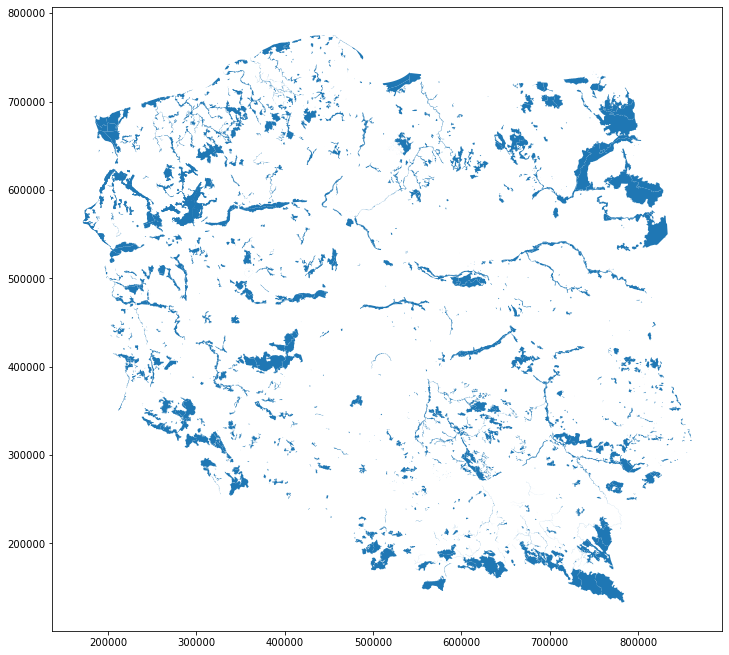

In [11]:
powiaty_int.plot(figsize=(12, 12))

In [12]:
area = gpd.GeoDataFrame(powiaty_int.area/1000000)
powiaty_int.insert(1, "Intersection Area [km2]", area)

In [13]:
powierzchnie_df = powiaty_int[["jpt_nazwa_", "nazwa", "Area [km2]", "N2000 Area [km2]", "Intersection Area [km2]"]]
powierzchnie_df

,jpt_nazwa_,nazwa,Area [km2],N2000 Area [km2],Intersection Area [km2]
0,powiat niżański,Dolina Dolnej Tanwi,785.532651,85.180080,21.349669
1,powiat biłgorajski,Dolina Dolnej Tanwi,1681.621355,85.180080,63.830411
2,powiat niżański,Bory Bagienne nad Bukową,785.532651,5.322001,5.322001
3,powiat niżański,Dolina Dolnego Sanu,785.532651,101.766425,31.630771
4,powiat przeworski,Dolina Dolnego Sanu,697.960193,101.766425,3.446530
...,...,...,...,...,...
1545,powiat nakielski,Łąki Trzęślicowe w Foluszu,1119.141475,21.308410,21.308410
1546,powiat nakielski,Solniska Szubińskie,1119.141475,3.618819,3.618819
1547,powiat tucholski,Kościół w Śliwicach,1073.987426,0.001125,0.001125
1548,powiat tucholski,Doliny Brdy i Stążki w Borach Tucholskich,1073.987426,39.483503,39.483503


In [14]:
powierzchnie_df = powierzchnie_df[["jpt_nazwa_", "Intersection Area [km2]"]].groupby(by="jpt_nazwa_").sum()
powierzchnie_df

,Intersection Area [km2]
jpt_nazwa_,
powiat Bielsko-Biała,24.807997
powiat Bydgoszcz,5.565014
powiat Bytom,8.395425
powiat Częstochowa,0.687616
powiat Dąbrowa Górnicza,8.807191
...,...
powiat żarski,180.666551
powiat żniński,42.217656
powiat żuromiński,3.300059


In [15]:
result_gdf = powiaty_gdf.merge(powierzchnie_df, on=('jpt_nazwa_'), how='left')
result_gdf = result_gdf[["iip_identy", "jpt_nazwa_", "Area [km2]", "Intersection Area [km2]", "geometry"]]
nature_2000_share = gpd.GeoDataFrame(result_gdf["Intersection Area [km2]"]/result_gdf["Area [km2]"])
result_gdf.insert(4, "N2000 share", nature_2000_share)
result_gdf = result_gdf[["iip_idnazenty", "jpt_nazwa_", "Area [km2]", "N2000 share", "geometry"]]
result_gdf

,iip_identy,jpt_nazwa_,Area [km2],N2000 share,geometry
0,f87cae01-4621-41f4-b768-c777cf94d1d8,powiat niżański,785.532651,0.100539,"MULTIPOLYGON (((711095.856 277431.597, 711101...."
1,f322275e-1c48-431f-889e-8bb0ccb46e81,powiat przemyski,1211.565190,0.330292,"MULTIPOLYGON (((734488.435 209795.384, 734490...."
2,59e7c5a7-8597-4c55-812a-b30932c08dd2,powiat przeworski,697.960193,0.085374,"MULTIPOLYGON (((731943.256 233158.050, 731989...."
3,e86b1e71-8958-42ee-bec5-ca3c87907bc8,powiat ropczycko-sędziszowski,548.023258,0.001243,"MULTIPOLYGON (((676562.888 239118.997, 676567...."
4,7f2af54d-150f-4b9f-b9fb-d2ce1b04166e,powiat rzeszowski,1157.134339,0.011444,"MULTIPOLYGON (((696894.808 237348.347, 696909...."
...,...,...,...,...,...
375,82fd2232-f3be-487e-b7be-b6c27e9bed68,powiat nakielski,1119.141475,0.134130,"MULTIPOLYGON (((386094.901 571345.551, 386116...."
376,1f87dd2e-136e-425b-a28e-fa7744058fb4,powiat rypiński,585.891454,0.002121,"MULTIPOLYGON (((512068.791 574197.205, 512079...."
377,024e370e-d84e-4487-a467-d184ee88816e,powiat tucholski,1073.987426,0.036765,"MULTIPOLYGON (((407425.341 632945.928, 407513...."
378,a6773a99-a577-451d-9e24-a4b3e47ecf57,powiat chełmiński,526.320198,0.055353,"MULTIPOLYGON (((451113.176 597969.224, 451125...."


## Zapis do CSV

In [16]:
result_gdf.to_csv("zadanie1.csv", index=False)

## Wizualizacja

<AxesSubplot:>

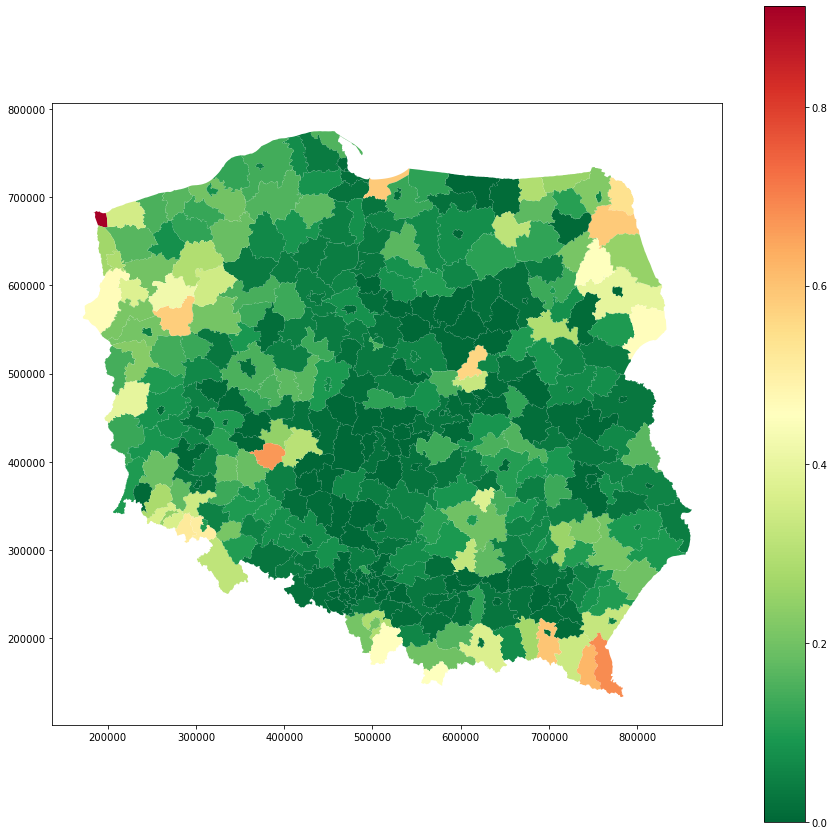

In [20]:
result_gdf = result_gdf.fillna(0)
result_gdf.plot(column='N2000 share', cmap='RdYlGn_r', legend=True, figsize=(15, 15))

In [27]:
result_gdf[["jpt_nazwa_", "N2000 share"]].sort_values("N2000 share", ascending=False)

,jpt_nazwa_,N2000 share
268,powiat Świnoujście,0.912274
134,powiat bieszczadzki,0.687022
356,powiat milicki,0.666890
9,powiat leski,0.621241
139,powiat krośnieński,0.596509
...,...,...
332,powiat Rybnik,0.000000
336,powiat Legnica,0.000000
30,powiat sierpecki,0.000000
185,powiat Leszno,0.000000
